# Project 1: TMDB Movie Dataset

This is my first mini side project.The objective of the project is to get more practice in the following: 
<br>
<br>
1) Defining analytic questions
<br>
2) Exploratory Data Analysis
<br>
3) Using Pandas / Dictionaries
<br>

Key takeaways and learning points from this project can be found at the end of this document.

Dataset Source: TMDB 5000 Movies - https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv
<br>


# Questions

1) How many movies are released each year from 1995 to 2016 (inclusive)? Which year has the highest number of movie releases? 
<br>
2) How many movies in the Adventure genre is released between 2014 and 2017? 
<br>
3) What are the top 10 popular movies (based on popularity score) in 2015? 
<br>
4) What is the mean budget for Comedy movies in 2016? 
<br>
5) How many movies in 2015 and 2016 have a runtime between 90 and 120 minutes? 
<br>
6) Is there a relationship between popularity and revenue? 
<br>

 

<b>Import CSV File</b>

In [53]:
#Import and Read File 
import pandas as pd
df = pd.read_csv('https://github.com/nkxdata/project/raw/master/dataset/tmdb_5000_movies.csv')

# df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
for column in json_columns:
    df[column] = df[column].apply(json.loads)

In [54]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://www.avatarmovie.com/,19995,"[{u'id': 1463, u'name': u'culture clash'}, {u'...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{u'name': u'Ingenious Film Partners', u'id': ...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2009-12-10,2787965087,162.0,"[{u'iso_639_1': u'en', u'name': u'English'}, {...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{u'id': 12, u'name': u'Adventure'}, {u'id': 1...",http://disney.go.com/disneypictures/pirates/,285,"[{u'id': 270, u'name': u'ocean'}, {u'id': 726,...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{u'name': u'Walt Disney Pictures', u'id': 2},...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2007-05-19,961000000,169.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://www.sonypictures.com/movies/spectre/,206647,"[{u'id': 470, u'name': u'spy'}, {u'id': 818, u...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{u'name': u'Columbia Pictures', u'id': 5}, {u...","[{u'iso_3166_1': u'GB', u'name': u'United King...",2015-10-26,880674609,148.0,"[{u'iso_639_1': u'fr', u'name': u'Français'}, ...",Released,A Plan No One Escapes,Spectre,6.3,4466


<b>1) How many movies are released each year from 1995 to 2016 (inclusive)? Which year has the highest number of movie releases? <b>

In [85]:
#Create another column for year since release date is in this format "2009-12-10" and I need the year 
df['release_year'] = df.release_date.str[:4]

movies = df.copy()
filteredmovies = movies[(movies['release_year']>= "1995") & (movies['release_year'] <= "2016")]
counted = filteredmovies.groupby('release_year').count()['id'].reset_index(name="Number of Movies")
counted

,release_year,Number of Movies
0,1995,70
1,1996,97
2,1997,112
3,1998,133
4,1999,171
5,2000,166
6,2001,183
7,2002,203
8,2003,169
9,2004,204


In [57]:
#Use the Max function
highest_num = counted.max()
year = counted[counted["Number of Movies"] == 247]
year['release_year']

14    2009
Name: release_year, dtype: object

<b>2) How many movies in the Adventure genre is released between 2014 and 2017? </b>

In [89]:
advdf = df.copy()
data = advdf.to_dict('records')

count = 0
for item in data:
    genrelist = item['genres']
    year = (item['release_year'])
    
    if year >= "2014" and year <= "2017":
        for genre in genrelist:
            names = genre['name']
            if names == "Adventure":
                count += 1 
    
                
print("There are " + str(count) +" adventure movies between 2014 and 2017.")


There are 95 adventure movies between 2014 and 2017.


<b>3) What are the top 10 popular movies (based on popularity score) in 2015? </b>

In [95]:
pop = df.copy()
data = pop.to_dict('records')
adict = {}

for item in data:
    popularity = item['popularity']
    movietitle = item['original_title']
    adict[movietitle] = popularity

rank = 1
for title, popularity in sorted(adict.iteritems(), key=lambda (k, v): (-v, k))[:10]:
        print ("Rank "+str(rank)+": " + "The movie title is " + str(title) +" and its popularity is " + str(popularity))
        rank += 1 


    
    

Rank 1: The movie title is Minions and its popularity is 875.581305
Rank 2: The movie title is Interstellar and its popularity is 724.247784
Rank 3: The movie title is Deadpool and its popularity is 514.569956
Rank 4: The movie title is Guardians of the Galaxy and its popularity is 481.098624
Rank 5: The movie title is Mad Max: Fury Road and its popularity is 434.278564
Rank 6: The movie title is Jurassic World and its popularity is 418.708552
Rank 7: The movie title is Pirates of the Caribbean: The Curse of the Black Pearl and its popularity is 271.972889
Rank 8: The movie title is Dawn of the Planet of the Apes and its popularity is 243.791743
Rank 9: The movie title is The Hunger Games: Mockingjay - Part 1 and its popularity is 206.227151
Rank 10: The movie title is Big Hero 6 and its popularity is 203.73459


<b> 4) What is the mean budget for Comedy movies in 2016? </b>

In [117]:
dfbudget = df.copy()
data = dfbudget.to_dict('records')

count = 0
totalbudget = 0

for item in data:
    budget = item['budget']
    genrelist = item['genres']
    year = (item['release_year'])
    
    if year == "2016":
        for genre in genrelist:
            names = genre['name']
            if names == "Comedy":
                count += 1 
                totalbudget += budget
            
meanbudget = totalbudget/count

print("There were " + str(count) +" Comedy movies in 2016.")
print("\nThe mean budget is $" + str(meanbudget))
    


There were 26 Comedy movies in 2016.

The mean budget is $39519230


<b>5) How many movies in 2015 and 2016 have a runtime between 90 and 120 minutes? </b>

In [139]:
dfrun = df.copy()
dfrun['runtime']
#records for 2015 and 2016
yearfilter = dfrun[(dfrun['release_year'] == "2015") | (dfrun['release_year'] == "2016")]
runfilter = yearfilter[(yearfilter['runtime']>=90) & (yearfilter['runtime']<=120)]
runfilter.groupby('release_year')['id'].count()

release_year
2015    132
2016     75
Name: id, dtype: int64

In [141]:
total = runfilter.count()['id']
print("There were " + str(total) +" movies in 2015 and 2016 that have a runtime between 90 and 120 minutes")

There were 207 movies in 2015 and 2016 that have a runtime between 90 and 120 minutes


<b> 6) Is there a relationship between popularity and revenue? </b>

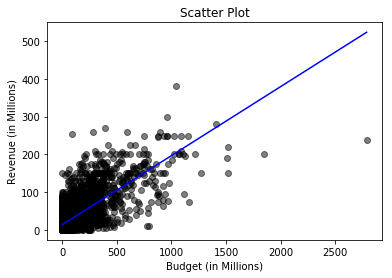

In [184]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy.stats import linregress

data = df.copy()
x = data['revenue']/1000000
y = data['budget']/1000000

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x,y,c=colors,alpha=0.5)
plt.plot(x, m * x + b, color="blue")

plt.title('Scatter Plot')
plt.xlabel('Budget (in Millions)')
plt.ylabel('Revenue (in Millions)')
plt.show()



# Key Takeaways and Learning points

1.Always check the data type. I didn't know that Year was a string and I should have converted it into an integer. 
<br> 

2.I learned about JSON in the 'Software Project Management' class last year. I'm not sure how to work with JSON 
   columns in Python. Found this tutorial on how to load data with JSON fields:
   https://www.kaggle.com/sohier/getting-imdb-kernels-working-with-tmdb-data/
   
   
<br>
3.As for the scatterplot, I feel that it would be good to find out R. There is a positive correlation between budget and revenue. However, I need to look at R to determine how strong it is. This is something that I'm planning to learn more about. The regression code for the scatterplot was taken from:
https://ourcodingclub.github.io/2018/04/18/pandas-python-intro.html 

<br>

4.As for the analytic questions, I think that it would be good to come up with something that involves 3 variables.

<br>
5.I looked at some kernels on Kaggle. I realise that there are many ways to go about cleaning the data. For instance, "genres" is one of those JSON fields in the CSV file. The format is as follows: 

[[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}].

I noticed that someone extracted all the genre names and used "|" as a delimiter. The id was omitted. I find it interesting.

<br>


